In [33]:
import pandas as pd 
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [3]:
df = pd.read_csv("C:/Users/DSU/Downloads/credit_risk.csv/credit_risk.csv")
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


<Axes: xlabel='Status', ylabel='count'>

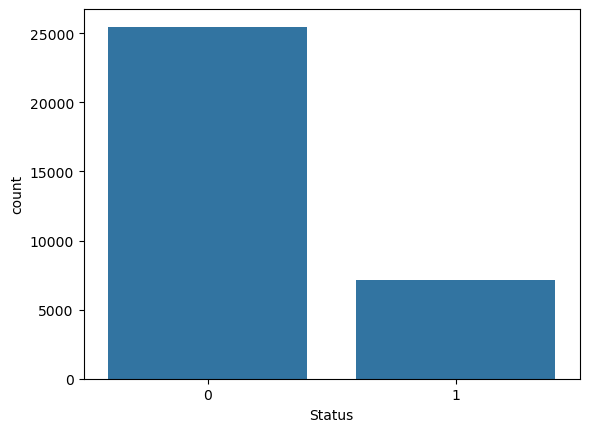

In [7]:
sns.countplot(x="Status", data = df)

In [13]:
cat_cols = ['Home', 'Intent', 'Status', 'Default']
encoder = OneHotEncoder(sparse_output=False)

encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
encoded.columns = encoder.get_feature_names_out(cat_cols)

df_model = pd.concat([df.drop(columns=cat_cols), encoded], axis=1)

In [50]:
x = df_model.drop('Default_Y', axis=1)
y = df_model['Default_Y']
print(y)

0        1.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
32576    0.0
32577    0.0
32578    0.0
32579    0.0
32580    0.0
Name: Default_Y, Length: 32581, dtype: float64


In [17]:
x_train,x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2, random_state=42
)

In [25]:
xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    learning_rate = 0.1,
    n_estimators=200, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
y_pred = xgb_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5322
         1.0       1.00      1.00      1.00      1195

    accuracy                           1.00      6517
   macro avg       1.00      1.00      1.00      6517
weighted avg       1.00      1.00      1.00      6517



<Figure size 1000x600 with 0 Axes>

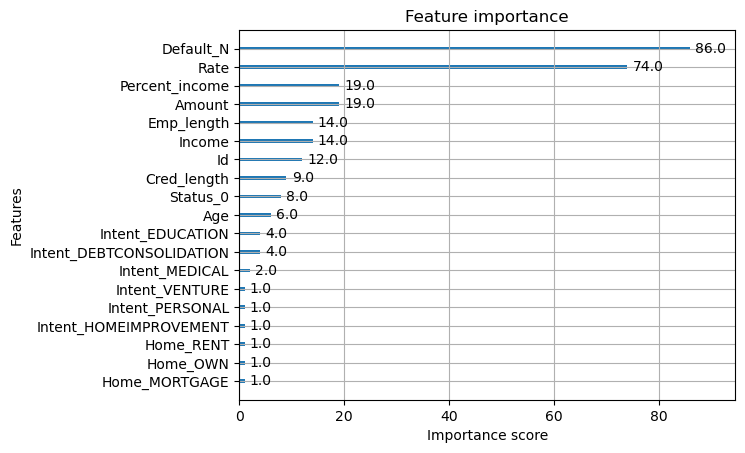

In [29]:
plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_model)
plt.show()

In [41]:
rate = df['Rate']
print(rate)

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: Rate, Length: 32581, dtype: float64


Text(0, 0.5, 'Rate')

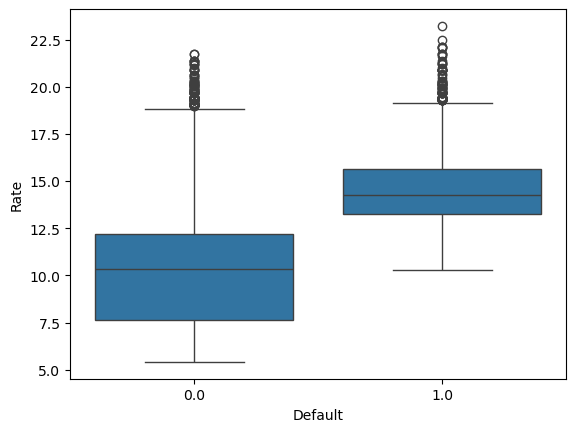

In [48]:
sns.boxplot(x=y, y=df['Rate'])
plt.xlabel('Default')
plt.ylabel('Rate')